### Hypothesis : Income bias based on occupation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("census.csv")

In [3]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k'],
      dtype='object')

In [8]:
o = pd.concat([df[df.greater_than_50k == 1].groupby("occupation").occupation.count(),
              df[df.greater_than_50k == 0].groupby("occupation").occupation.count()],
             axis=1, sort=False)

In [9]:
o.columns = ["occupation_gt_50k", "occupation_lt_50k"]
o.columns

Index(['occupation_gt_50k', 'occupation_lt_50k'], dtype='object')

In [13]:
o_calc = o.occupation_gt_50k / (o.occupation_gt_50k + o.occupation_lt_50k)
o_calc.sort_values(ascending=False, inplace=True)
o_calc

occupation
 Exec-managerial      0.484014
 Prof-specialty       0.449034
 Protective-serv      0.325116
 Tech-support         0.304957
 Sales                0.269315
 Craft-repair         0.226641
 Transport-moving     0.200376
 Adm-clerical         0.134483
 Machine-op-inspct    0.124938
 Farming-fishing      0.115694
 Armed-Forces         0.111111
 Handlers-cleaners    0.062774
 Other-service        0.041578
 Priv-house-serv      0.006711
dtype: float64

Text(0,0.5,'Percentage of People')

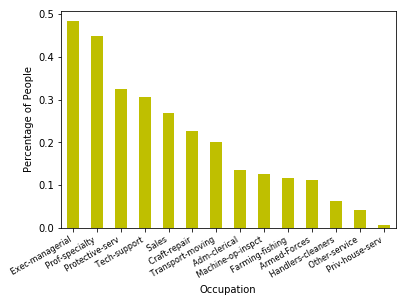

In [14]:
ax = o_calc.plot(kind="bar", color="y")
ax.set_xticklabels(o_calc.index, rotation=30, fontsize=8, ha="right")
ax.set_xlabel("Occupation")
ax.set_ylabel("Percentage of People")

### Conclusion: People with managerial or specialized occupations earn more money